## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

import model_metrics

print(model_metrics.__version__)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from model_tuner import Model, loadObjects
import model_tuner

from eda_toolkit import ensure_directory
from model_metrics import (
    summarize_model_performance,
    plot_calibration_curve,
    plot_conf_matrix,
)

0.0.0a1


## Set Model Path

In [2]:
print(f"Model Metrics version: {model_metrics.__version__}")
print(f"Model Metrics authors: {model_metrics.__author__} \n")

## Define base paths
## `base_path`` represents the parent directory of your current working directory
base_path = os.path.join(os.pardir)
## Go up one level from 'notebooks' to the parent directory, then into the
## 'results' folder

model_path = os.path.join(os.pardir, "model_files")
image_path_png = os.path.join(base_path, "images", "png_images")
image_path_svg = os.path.join(base_path, "images", "svg_images")

# Use the function to ensure the 'data' directory exists
ensure_directory(model_path)
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

Model Metrics version: 0.0.0a1
Model Metrics authors: Leonid Shpaner 

Directory exists: ../model_files
Directory exists: ../images/png_images
Directory exists: ../images/svg_images


## Load The Model Object and Test Data

In [3]:
model = loadObjects(os.path.join(model_path, "logistic_regression_model.pkl"))

X_test = pd.read_parquet(os.path.join(model_path, "X_test.parquet"))
y_test = pd.read_parquet(os.path.join(model_path, "y_test.parquet"))

Object loaded!


## Set The Desired Naming Conventions

In [4]:
pipelines_or_models = [
    model,
]

# Model titles
model_titles = [
    "Logistic Regression",
]

## Summarize Model Performance

In [5]:
model_summary = summarize_model_performance(
    pipelines_or_models=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    # model_threshold=thresholds,
    return_df=True,
    # custom_threshold=0.7,
)

model_summary

Model,Logistic Regression
Precision/PPV,0.781873
Average Precision,0.869025
Sensitivity/Recall,0.797764
Specificity,0.784449
F1-Score,0.789738
AUC ROC,0.880128
Brier Score,0.140390
Model Threshold,0.500000


## Plot The Calibration Curve

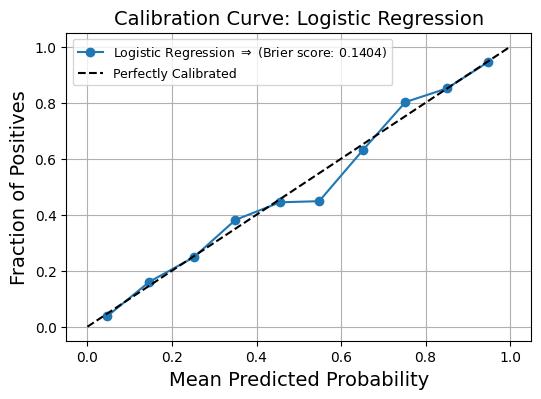

In [6]:
# Plot calibration curves in overlay mode
plot_calibration_curve(
    pipelines_or_models=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    overlay=False,
    title="Calibration Curves",
    text_wrap=40,
    figsize=(6, 4),
    label_fontsize=14,
    tick_fontsize=9,
    bins=10,
    show_brier_score=True,
    # grid=True,
    # gridlines=False,
    linestyle_kwgs={"color": "black"},
)

## Plot The Confusion Matrix

Confusion Matrix for Logistic Regression: 

          Predicted 0  Predicted 1
Actual 0          797          219
Actual 1          199          785

Classification Report for Logistic Regression: 

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1016
           1       0.78      0.80      0.79       984

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



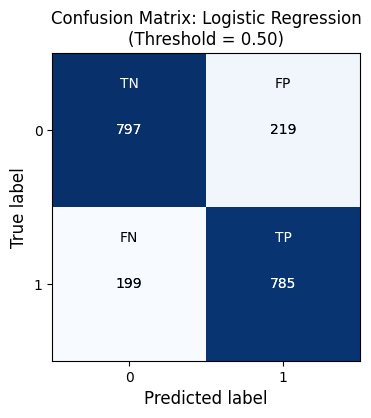

In [8]:
plot_conf_matrix(
    pipelines_or_models=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    cmap="Blues",
    text_wrap=40,
    save_plot=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    grid=False,
    n_cols=3,
    n_rows=1,
    figsize=(4, 4),
    show_colorbar=False,
    # label_fontsize=14,
    # tick_fontsize=12,
    inner_fontsize=10,
    class_report=True,
    # custom_threshold=0.5,
    # labels=False,
)